In [238]:
import pandas as pd
import numpy as np
import sklearn as sk
import tsfresh as ts

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


<h3>Data Preparation:</h3>

<h4>Definition der Dataframes:</h4>

Einlesen der Dateien als Dataframes aufgeteilt nach verschiedenen Sensoren (Accelerometer, Gyroscope, Orientation, Gravity)

Datenaufzeichnung mit Aktivitäten des alltäglichen Lebens: -> Aufteilung in einen Dataframe mit Label "df_walk"
- Laufen
- Treppe hoch
- Treppe runter
- auf Stuhl setzen
- Ins Bett legen

Fallen: (-> Aufteilung in einen Dataframe mit Label "df_fall")
- aus dem Laufen stürzen
- aus dem Stehen stürzen
- aus dem Sitzen stürzen



In [239]:
df = []

all_filenames = ["data/treppe_hochlaufen_Paul_v1.json",
"data/treppe_hochlaufen_Paul_v2.json",
"data/treppe_hochlaufen_Luca.json",
"data/treppe_runterlaufen_Paul_v1.json",
"data/treppe_runterlaufen_Paul_v2.json",
"data/treppe_runterlaufen_Luca.json",
"data/laufen_Paul_v1.json",
"data/laufen_Paul_v2.json",
"data/laufen_Luca.json",
"data/hinlegen_Paul_v1.json",
"data/hinlegen_Paul_v2.json",
"data/hinlegen_Luca.json",
"data/hinsetzen_Paul_v1.json",
"data/hinsetzen_Paul_v2.json",
"data/hinsetzen_Luca.json",

"data/treppe_hoch1.json",
"data/treppe_runter1.json",
"data/TreppeHochlaufen_Anitan.json",
"data/TreppeRunterlaufen_Anitan.json",
"data/bett_setzen1.json",
"data/BettLegen_Anitan.json",
"data/Hinsetzen_Anitan.json",
"data/hinsetzen1.json",
"data/Laufen_Anitan.json",
"data/laufen_normal1.json"]

for filename in all_filenames:
    df_walk = pd.read_json(filename)
    df.append(df_walk)

#df[1]

df_walk = pd.concat(df)
#print(df)


df_f = []
all_filenames_f = ["data/laufen_fall_Paul_1.json",
                   "data/laufen_fall_Paul_2.json",
                   "data/laufen_fall_Paul_3.json",
                   "data/laufen_fall_Paul_4.json",
                   "data/laufen_fall_Paul_5.json",
                   "data/laufen_fall_Paul_6.json",
                   "data/laufen_fall_Paul_7.json",
                   "data/laufen_fall_Paul_8.json",
                   "data/laufen_fall_Paul_9.json",
                   "data/laufen_fall_Paul_10.json",
                   "data/fall_stehen_Luca_1.json",
                   "data/fall_stehen_Luca_2.json",
                   "data/fall_stehen_Luca_3.json",
                   "data/fall_stehen_Luca_4.json",
                   "data/fall_stehen_Luca_5.json",
                   "data/fall_stehen_Luca_6.json",
                   "data/fall_stehen_Luca_7.json",
                   "data/fall_stehen_Luca_8.json",
                   "data/fall_stehen_Luca_9.json",
                   "data/fall_stehen_Luca_10.json",
                   "data/sitzen_fall_Paul_1.json",
                   "data/sitzen_fall_Paul_2.json",
                   "data/sitzen_fall_Paul_3.json",
                    "data/sitzen_fall_Paul_4.json",
                    "data/sitzen_fall_Paul_5.json",
                    "data/sitzen_fall_Paul_6.json",
                    "data/sitzen_fall_Paul_7.json",
                    "data/sitzen_fall_Paul_8.json",
                    "data/sitzen_fall_Paul_9.json",
                    "data/sitzen_fall_Paul_10.json",
                    "data/SturzStehen1_Anitan.json",
                    "data/SturzStehen2_Anitan.json",
                    "data/SturzStehen3_Anitan.json",
                    "data/SturzStehen4_Anitan.json",
                    "data/SturzStehen5_Anitan.json",
                    "data/SturzStehen6_Anitan.json",
                    "data/SturzStehen7_Anitan.json",
                    "data/SturzStehen8_Anitan.json",
                    "data/SturzStehen9_Anitan.json",
                    "data/SturzStehen10_Anitan.json",
                    "data/laufen_fall1.json",
                    "data/laufen_fall2.json",
                    "data/laufen_fall3.json",
                    "data/laufen_fall4.json",
                    "data/laufen_fall5.json",
                    "data/laufen_fall6.json",
                    "data/laufen_fall7.json",
                    "data/laufen_fall8.json",
                    "data/laufen_fall9.json",
                    "data/laufen_fall10.json"]   

for filename in all_filenames_f:
    df_fall= pd.read_json(filename)
    df_f.append(df_fall)
#df_f[1]

df_fall = pd.concat(df_f)



In [240]:
df_walk

,sensor,time,seconds_elapsed,z,y,x,version,device name,recording time,platform,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,1.685385e+18,0.028716,0.528048,-1.101480,-1.048881,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,1.685385e+18,0.038684,0.078242,-0.974611,-1.168716,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,1.685385e+18,0.048653,-1.147857,-1.113927,-1.032955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,1.685385e+18,0.058621,-1.713861,-1.347224,-0.949106,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,1.685385e+18,0.068590,-1.450866,-1.383157,-0.911834,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,GyroscopeUncalibrated,1.685083e+18,31.189391,0.456452,0.298920,0.213691,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6203,GyroscopeUncalibrated,1.685083e+18,31.199455,0.351914,0.359441,0.112437,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6204,GyroscopeUncalibrated,1.685083e+18,31.209519,0.271619,0.357680,0.017966,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6205,Metadata,NaN,NaN,NaN,NaN,NaN,3.0,iPhone 13 Pro,2023-05-26_06-37-02,ios,...,87dcec7c-b9f6-41cd-93ba-498cba653a5e,Accelerometer|Gravity|Gyroscope|Orientation|An...,5|5|5|5||5|5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Veranschaulichung exemplarischer Dataframes:

Auswahl der relevanten Spalten/ Informationen aus dem Datensatz

In [241]:
df_walk.columns

Index(['sensor', 'time', 'seconds_elapsed', 'z', 'y', 'x', 'version',
       'device name', 'recording time', 'platform', 'appVersion', 'device id',
       'sensors', 'sampleRateMs', 'yaw', 'qx', 'qz', 'roll', 'qw', 'qy',
       'pitch'],
      dtype='object')

Umrechnung der Zeit aus Sekunden in einen Zeitstempel:

In [242]:
#preprocessing data
df_walk['time'] = pd.to_datetime(df_walk['time'])
df_fall['time'] = pd.to_datetime(df_fall['time'])

df_walk.head()

,sensor,time,seconds_elapsed,z,y,x,version,device name,recording time,platform,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,2023-05-29 18:29:11.100716288,0.028716,0.528048,-1.101480,-1.048881,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,2023-05-29 18:29:11.110684416,0.038684,0.078242,-0.974611,-1.168716,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,2023-05-29 18:29:11.120653312,0.048653,-1.147857,-1.113927,-1.032955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,2023-05-29 18:29:11.130621440,0.058621,-1.713861,-1.347224,-0.949106,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,2023-05-29 18:29:11.140590336,0.068590,-1.450866,-1.383157,-0.911834,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index als Zeitstempel definiert:

In [243]:
df_walk = df_walk.set_index('time')
df_fall = df_fall.set_index('time')



Ausgabe aller Sensoren, die in Datensatz vorhanden sind:

In [244]:
df_walk['sensor'].unique()

array(['Accelerometer', 'AccelerometerUncalibrated', 'Gravity',
       'Gyroscope', 'GyroscopeUncalibrated', 'Metadata', 'Orientation'],
      dtype=object)

In [245]:
df_fall['sensor'].unique()

array(['Accelerometer', 'AccelerometerUncalibrated', 'Gravity',
       'Gyroscope', 'GyroscopeUncalibrated', 'Metadata', 'Orientation'],
      dtype=object)

Quick Fix der SensorBezeichner:

Aufteilung der Daten nach den zu betrachtenden Sensoren:

In [246]:
df_walk_acc = df_walk[df_walk['sensor'] == 'AccelerometerUncalibrated']
df_fall_acc = df_fall[df_fall['sensor'] == 'AccelerometerUncalibrated']


df_walk_gyro = df_walk[df_walk['sensor'] == 'GyroscopeUncalibrated']
df_fall_gyro = df_fall[df_fall['sensor'] == 'GyroscopeUncalibrated']


df_walk_or = df_walk[df_walk['sensor'] == 'Orientation']
df_fall_or = df_fall[df_fall['sensor'] == 'Orientation']


df_walk_grav = df_walk[df_walk['sensor'] == 'Gravity']
df_fall_grav = df_fall[df_fall['sensor'] == 'Gravity']


Beschreiben des Datensatzes:

In [247]:
df_fall_acc

,sensor,seconds_elapsed,z,y,x,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
time,,,,,,,,,,,,,,,,,,,,
2023-06-23 12:08:21.920027904,AccelerometerUncalibrated,0.022028,-0.951218,-0.583588,0.104538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-23 12:08:21.929996032,AccelerometerUncalibrated,0.031996,-1.022659,-0.578735,0.091064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-23 12:08:21.939963904,AccelerometerUncalibrated,0.041964,-1.031525,-0.541168,0.076263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-23 12:08:21.949931008,AccelerometerUncalibrated,0.051931,-1.032669,-0.519211,0.092682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-23 12:08:21.959898880,AccelerometerUncalibrated,0.061899,-1.041367,-0.511246,0.109665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26 06:15:01.575603968,AccelerometerUncalibrated,29.156604,-0.895996,-0.293152,0.338715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-26 06:15:01.585669120,AccelerometerUncalibrated,29.166669,-0.895630,-0.289627,0.340637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-26 06:15:01.595732992,AccelerometerUncalibrated,29.176733,-0.891815,-0.289780,0.343185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
df_fall_or.describe()

,seconds_elapsed,z,y,x,version,yaw,qx,qz,roll,qw,qy,pitch
count,13049.000000,0.0,0.0,0.0,0.0,13049.000000,13049.000000,13049.000000,13049.000000,13049.000000,13049.000000,13049.000000
mean,-766.214859,NaN,NaN,NaN,NaN,-0.309016,0.018541,-0.116325,0.397803,-0.419412,-0.091764,0.300980
std,19944.460434,NaN,NaN,NaN,NaN,1.346945,0.297293,0.525245,1.055706,0.541239,0.378314,0.358703
min,-593318.402898,NaN,NaN,NaN,NaN,-3.139099,-0.801361,-0.968644,-3.141320,-0.998924,-0.986526,-0.819194
25%,1.103755,NaN,NaN,NaN,NaN,-1.573477,-0.173678,-0.557749,-0.053642,-0.790920,-0.293958,0.112080
50%,2.195407,NaN,NaN,NaN,NaN,-0.576807,-0.004259,-0.278719,0.345937,-0.650195,-0.094649,0.288281
75%,3.464099,NaN,NaN,NaN,NaN,0.950886,0.234478,0.474326,0.963412,-0.259073,0.145016,0.479248
max,7.080799,NaN,NaN,NaN,NaN,3.123546,0.845699,0.858998,3.116903,0.967051,0.958279,1.529332


Auswahl der relevanten Spalten aus den Dataframes der nach Sensordaten:

-> Hier wurden die Werte z,x,y aus den Gyro Sensoren in z_ umbenannt, um später für den join der Tabellen eindeutige Spalten zu erzeugen

In [249]:
df_walk_acc = df_walk_acc[['z','x','y']]
df_fall_acc = df_fall_acc[['z','x','y']]


df_walk_gyro = df_walk_gyro[['z','x','y']]
df_fall_gyro = df_fall_gyro[['z','x','y']]


df_walk_or = df_walk_or[['qx','qz','qw','qy']]
df_fall_or = df_fall_or[['qx','qz','qw','qy']]


df_walk_grav = df_walk_grav[['z','x','y']]
df_fall_grav = df_fall_grav[['z','x','y']]

df_walk_gyro.rename(columns={ 'z': 'gyro_z' , 'x': 'gyro_x' , 'y': 'gyro_y'}, inplace=True)
df_fall_gyro.rename(columns={ 'z': 'gyro_z' , 'x': 'gyro_x' , 'y': 'gyro_y'}, inplace=True)

df_walk_grav.rename(columns={ 'z': 'grav_z' , 'x': 'grav_x' , 'y': 'grav_y'}, inplace=True)
df_fall_grav.rename(columns={ 'z': 'grav_z' , 'x': 'grav_x' , 'y': 'grav_y'}, inplace=True)


In [250]:
len(df_walk_grav)

73055

Plot der Dataframes zur Kontrolle und Veranschaulichung der Werte:

<Axes: xlabel='time'>

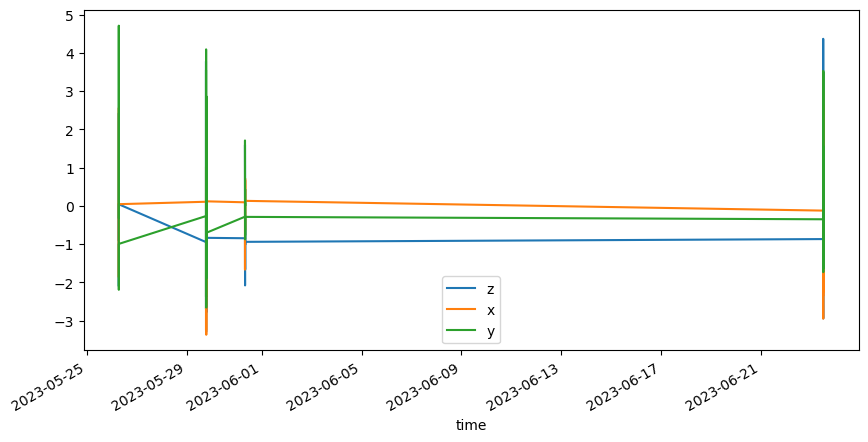

In [251]:
df_walk_acc.plot(figsize=(10,5))

<Axes: xlabel='time'>

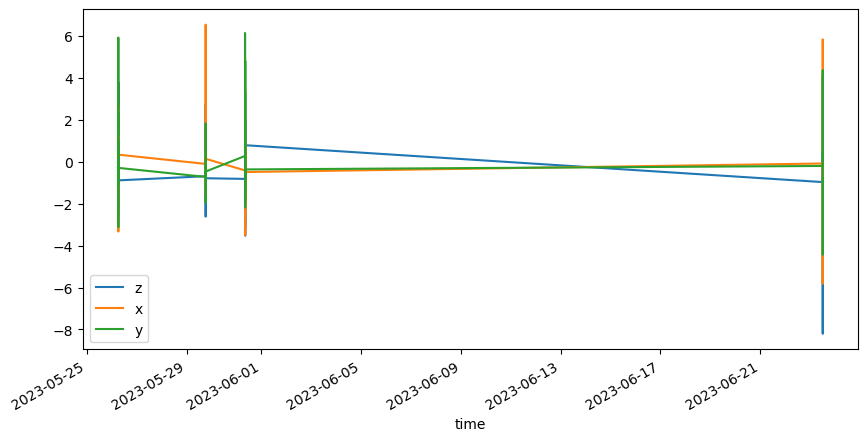

In [252]:
df_fall_acc.plot(figsize=(10,5))

<Axes: xlabel='time'>

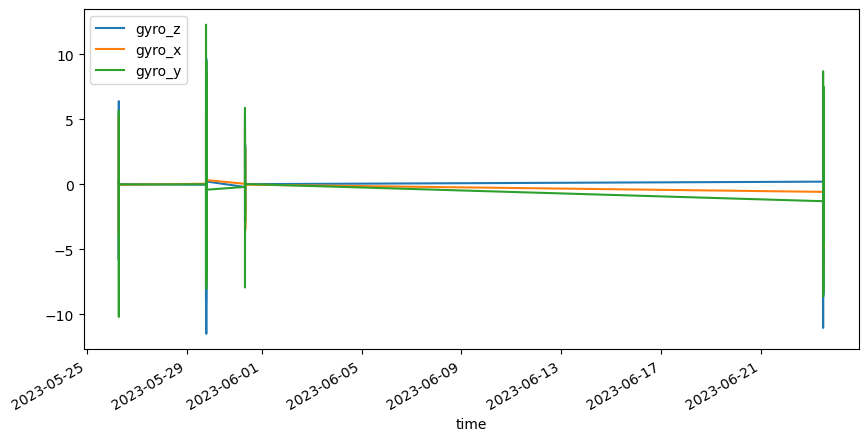

In [253]:
df_walk_gyro.plot(figsize=(10,5))

<Axes: xlabel='time'>

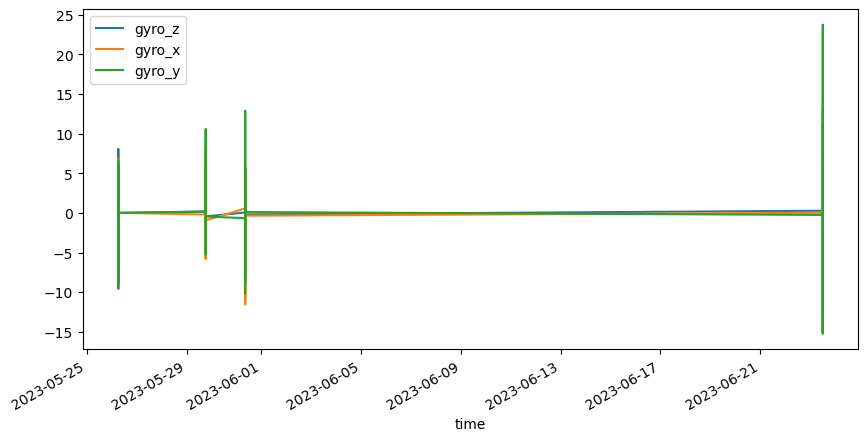

In [254]:
df_fall_gyro.plot(figsize=(10,5))

Vergabe von Labels auf der Basis des Dataframe Ursprungs (Einteilung in Walk und Fall):

-> Verbinden der verschiedenen DataFrames nach Sensoren zu einem kombinierten Dataframe

In [255]:
df_walk_acc['label'] = "walk"
df_fall_acc['label'] = "fall"

df_walk_gyro['label'] = "walk"
df_fall_gyro['label'] = "fall"

df_walk_or['label'] = "walk"
df_fall_or['label'] = "fall"

df_walk_grav['label'] = "walk"  
df_fall_grav['label'] = "fall"


df_combined_walk = pd.merge(df_walk_acc, df_walk_gyro, on='time')
df_combined_fall = pd.merge(df_fall_acc, df_fall_gyro, on='time')

#df_combined_walk = pd.merge(df_combined_walk, df_walk_or, on='row_number')
#df_combined_fall = pd.merge(df_combined_fall, df_fall_or, on='row_number')

#df_combined_walk = pd.merge(df_combined_walk, df_walk_grav, on='row_number')
#df_combined_fall = pd.merge(df_combined_fall, df_fall_grav, on='row_number')

C:\Users\anigu\AppData\Local\Temp\ipykernel_26364\538403516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fall_acc['label'] = "fall"


Check der kombinierten DataFrames:

In [256]:
df_walk_grav.head()

,grav_z,grav_x,grav_y,label
time,,,,
2023-05-29 18:29:11.100716288,-9.283345,1.252837,-2.901774,walk
2023-05-29 18:29:11.110684416,-9.277962,1.263886,-2.914171,walk
2023-05-29 18:29:11.120653312,-9.269165,1.267437,-2.940503,walk
2023-05-29 18:29:11.130621440,-9.259364,1.245238,-2.980595,walk
2023-05-29 18:29:11.140590336,-9.247922,1.199737,-3.034294,walk


In [257]:
df_combined_walk

,z,x,y,label_x,gyro_z,gyro_x,gyro_y,label_y
time,,,,,,,,
2023-05-29 18:29:11.091994624,-0.967041,0.045380,-0.416260,walk,-0.231949,-0.061879,-0.161013,walk
2023-05-29 18:29:11.101962240,-0.893433,0.025757,-0.411240,walk,-0.233592,0.107064,0.017106,walk
2023-05-29 18:29:11.111930368,-0.919373,0.010162,-0.397598,walk,-0.242437,0.257259,0.047374,walk
2023-05-29 18:29:11.121899264,-1.028580,0.019272,-0.406296,walk,-0.239005,0.409722,-0.204598,walk
2023-05-29 18:29:11.131867392,-1.118225,0.030807,-0.435394,walk,-0.229730,0.553924,-0.496498,walk
...,...,...,...,...,...,...,...,...
2023-05-26 06:37:33.943262976,-0.894089,0.243195,0.134171,walk,0.647651,0.389635,-0.020721,walk
2023-05-26 06:37:33.953326848,-0.885330,0.211731,0.114243,walk,0.558845,0.308481,0.166195,walk
2023-05-26 06:37:33.963390720,-0.880737,0.197052,0.087601,walk,0.456452,0.213691,0.298920,walk


In [258]:
#df_combined_walk.describe()
len(df_combined_walk)

86660

In [259]:
df_combined_fall.head(-5)

,z,x,y,label_x,gyro_z,gyro_x,gyro_y,label_y
time,,,,,,,,
2023-06-23 12:09:26.726447104,-0.853943,0.055573,-0.325180,fall,0.018702,-0.296939,0.247161,fall
2023-06-23 12:09:26.736413952,-0.817993,0.075912,-0.315323,fall,0.010588,-0.409681,0.247593,fall
2023-06-23 12:09:26.746382080,-0.777313,0.103943,-0.323853,fall,0.041053,-0.578489,0.347036,fall
2023-06-23 12:09:26.756349184,-0.754684,0.120941,-0.336594,fall,0.108765,-0.771343,0.509045,fall
2023-06-23 12:09:26.766316288,-0.758179,0.124817,-0.330475,fall,0.189835,-0.924996,0.663297,fall
...,...,...,...,...,...,...,...,...
2023-05-26 06:15:01.525281792,-0.902313,0.338669,-0.292252,fall,-0.008214,0.000882,0.005573,fall
2023-05-26 06:15:01.535346944,-0.898300,0.341415,-0.288971,fall,-0.004147,0.023150,-0.012377,fall
2023-05-26 06:15:01.545410816,-0.901611,0.339645,-0.288803,fall,-0.007255,0.036433,-0.020707,fall


Bestimmung der Länge der Datensätze:

In [260]:
df_help = df_combined_walk.reset_index()
print(df_help.iloc[-1,0] - df_help.iloc[0,0])

-4 days +12:08:22.891524096


Ausschluss der Spalte "label_x" da redundant: 

In [261]:
df_combined_walk.drop('label_x',axis=1, inplace=True)
df_combined_fall.drop('label_x',axis=1, inplace=True)

Überprüfen der Vollständigkeit des Datensatzes:

In [262]:
laenge = len(df_walk_acc) + len(df_walk_gyro)
print("Doppelte Zeilen in Dataframes, ohne join auf Time:", laenge)
print("Einfache Anzahl an Zeilen, bei richtigem Merge:",len(df_combined_walk))
print("Länge des Merges:", len(df_combined_walk))

Doppelte Zeilen in Dataframes, ohne join auf Time: 209710
Einfache Anzahl an Zeilen, bei richtigem Merge: 86660
Länge des Merges: 86660


Aufteilen der DF's in einzelne Abschnitte mit den Abständen 100 Datenpunkte:
- ToDo: Anpassen der Länge von Sequenzen und deren Auswirkung auf die Modellgüte/ Accuracy

In [263]:
df_combined_walk['id'] = 0
df_combined_fall['id'] = 0

id = 1

var1 = 100
var2 = 100

for i in range(0, len(df_combined_walk)):
    df_combined_walk.iloc[i,7] = id
    

    if i >= var1: 
        var1 = var1 + 100
        id+=1

id +=1

for i in range(0, len(df_combined_fall)):
    
    df_combined_fall.iloc[i,7] = id

    if i >= var2: 
        var2 = var2 + 100
        id+=1  

In [264]:
df_combined_walk

,z,x,y,gyro_z,gyro_x,gyro_y,label_y,id
time,,,,,,,,
2023-05-29 18:29:11.091994624,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,walk,1
2023-05-29 18:29:11.101962240,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,walk,1
2023-05-29 18:29:11.111930368,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,walk,1
2023-05-29 18:29:11.121899264,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,walk,1
2023-05-29 18:29:11.131867392,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,walk,1
...,...,...,...,...,...,...,...,...
2023-05-26 06:37:33.943262976,-0.894089,0.243195,0.134171,0.647651,0.389635,-0.020721,walk,867
2023-05-26 06:37:33.953326848,-0.885330,0.211731,0.114243,0.558845,0.308481,0.166195,walk,867
2023-05-26 06:37:33.963390720,-0.880737,0.197052,0.087601,0.456452,0.213691,0.298920,walk,867


In [265]:
df_combined_fall

,z,x,y,gyro_z,gyro_x,gyro_y,label_y,id
time,,,,,,,,
2023-06-23 12:09:26.726447104,-0.853943,0.055573,-0.325180,0.018702,-0.296939,0.247161,fall,868
2023-06-23 12:09:26.736413952,-0.817993,0.075912,-0.315323,0.010588,-0.409681,0.247593,fall,868
2023-06-23 12:09:26.746382080,-0.777313,0.103943,-0.323853,0.041053,-0.578489,0.347036,fall,868
2023-06-23 12:09:26.756349184,-0.754684,0.120941,-0.336594,0.108765,-0.771343,0.509045,fall,868
2023-06-23 12:09:26.766316288,-0.758179,0.124817,-0.330475,0.189835,-0.924996,0.663297,fall,868
...,...,...,...,...,...,...,...,...
2023-05-26 06:15:01.575603968,-0.895996,0.338715,-0.293152,-0.006286,0.024225,-0.006792,fall,1139
2023-05-26 06:15:01.585669120,-0.895630,0.340637,-0.289627,-0.002961,0.014271,0.007406,fall,1139
2023-05-26 06:15:01.595732992,-0.891815,0.343185,-0.289780,0.001325,0.012306,0.004526,fall,1139


Konkatenieren der verschiedenen Dataframes zu einem gemeinsamen DF:

In [266]:
df_combined = pd.concat([df_combined_walk, df_combined_fall])

In [267]:
df_combined.head(16807)

,z,x,y,gyro_z,gyro_x,gyro_y,label_y,id
time,,,,,,,,
2023-05-29 18:29:11.091994624,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,walk,1
2023-05-29 18:29:11.101962240,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,walk,1
2023-05-29 18:29:11.111930368,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,walk,1
2023-05-29 18:29:11.121899264,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,walk,1
2023-05-29 18:29:11.131867392,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,walk,1
...,...,...,...,...,...,...,...,...
2023-05-29 18:30:50.107187456,-0.079193,-0.352829,0.964813,-0.117943,0.402759,-0.024641,walk,169
2023-05-29 18:30:50.117155584,0.041275,-0.237503,0.816345,0.179756,0.352962,0.002241,walk,169
2023-05-29 18:30:50.127123712,0.121353,-0.156967,0.733505,0.420417,0.316896,0.077187,walk,169


Check auf Nullwerte:

In [268]:
df_combined.isnull().sum()

z          0
x          0
y          0
gyro_z     0
gyro_x     0
gyro_y     0
label_y    0
id         0
dtype: int64

In [269]:
df_combined.reset_index(inplace=True)
df_combined.head()

,time,z,x,y,gyro_z,gyro_x,gyro_y,label_y,id
0,2023-05-29 18:29:11.091994624,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,walk,1
1,2023-05-29 18:29:11.101962240,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,walk,1
2,2023-05-29 18:29:11.111930368,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,walk,1
3,2023-05-29 18:29:11.121899264,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,walk,1
4,2023-05-29 18:29:11.131867392,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,walk,1


In [270]:
df_combined.replace(['walk'],0,inplace=True)
df_combined.replace(['fall'],1,inplace=True)
df_combined.head()

,time,z,x,y,gyro_z,gyro_x,gyro_y,label_y,id
0,2023-05-29 18:29:11.091994624,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,0,1
1,2023-05-29 18:29:11.101962240,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,0,1
2,2023-05-29 18:29:11.111930368,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,0,1
3,2023-05-29 18:29:11.121899264,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,0,1
4,2023-05-29 18:29:11.131867392,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,0,1


Berechnen der extracted_features mit tsfresh: 

from tsfresh import extract_features
extracted_features = extract_features(df_combined, column_id="id",column_sort='time')

Ausgeben der errechneten Features mittels TsFresh:

In [271]:
labels= df_combined[['id','label_y']]
labels= labels.drop_duplicates()
labels= labels.set_index('id')
y= labels.iloc[:,0]
y.duplicated().sum()

print(y)


id
1       0
2       0
3       0
4       0
5       0
       ..
1135    1
1136    1
1137    1
1138    1
1139    1
Name: label_y, Length: 1139, dtype: int64


ACHTUNG: select_features vs. extract_relevant_features Unterschied ermitteln, Recherche

Features_filtered wird nicht weiter benutzt

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
#test
impute(extracted_features)
features_filtered = select_features(extracted_features,y)

In [272]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(df_combined,y,
                                                     column_id='id', column_sort='time')

Feature Extraction:   0%|          | 0/10 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 10/10 [14:06<00:00, 84.67s/it]


In [273]:
p= ts.feature_selection.relevance.calculate_relevance_table(features_filtered_direct, y, ml_task='classification')
df_p100= p.iloc[111:311,:]
df_tolist= df_p100['feature'].tolist()

In [274]:
df_tolist

['y__permutation_entropy__dimension_7__tau_1',
 'y__permutation_entropy__dimension_6__tau_1',
 'y__permutation_entropy__dimension_5__tau_1',
 'y__permutation_entropy__dimension_3__tau_1',
 'y__permutation_entropy__dimension_4__tau_1',
 'y__number_peaks__n_1',
 'x__permutation_entropy__dimension_7__tau_1',
 'gyro_z__permutation_entropy__dimension_7__tau_1',
 'gyro_z__permutation_entropy__dimension_6__tau_1',
 'x__permutation_entropy__dimension_3__tau_1',
 'gyro_z__permutation_entropy__dimension_5__tau_1',
 'x__permutation_entropy__dimension_6__tau_1',
 'gyro_z__permutation_entropy__dimension_4__tau_1',
 'gyro_z__permutation_entropy__dimension_3__tau_1',
 'x__permutation_entropy__dimension_4__tau_1',
 'x__number_peaks__n_1',
 'x__permutation_entropy__dimension_5__tau_1',
 'gyro_z__number_peaks__n_1',
 'y__number_peaks__n_3',
 'gyro_z__cid_ce__normalize_True',
 'x__number_peaks__n_5',
 'x__number_peaks__n_3',
 'gyro_z__approximate_entropy__m_2__r_0.5',
 'gyro_z__approximate_entropy__m_2__

features_filtered.columns

x_features=features_filtered_direct.iloc[:,111:]

In [275]:
array= np.asarray(df_tolist)
x_features= features_filtered_direct[[df_tolist[0]]]

list=[]
list.append(x_features.columns)

In [276]:
X_train, X_test, y_train, y_test = train_test_split(x_features, y, test_size=0.30, random_state=101)

In [277]:
y_test

id
1058    1
763     0
433     0
565     0
268     0
       ..
1125    1
446     0
187     0
641     0
368     0
Name: label_y, Length: 342, dtype: int64

In [278]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [279]:
#Test via Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[210  54]
 [ 45  33]]


In [280]:
#Test via Accuracy & Classification Report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7105263157894737
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       264
           1       0.38      0.42      0.40        78

    accuracy                           0.71       342
   macro avg       0.60      0.61      0.60       342
weighted avg       0.72      0.71      0.72       342



In [281]:
from sklearn.ensemble import RandomForestClassifier

In [282]:
#randomforest
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

#Test via Konfusionsmatrix
dm = confusion_matrix(y_test, y_pred)
print(dm)

[[205  59]
 [ 42  36]]


In [283]:
#Test via Accuracy & Classification Report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7046783625730995
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       264
           1       0.38      0.46      0.42        78

    accuracy                           0.70       342
   macro avg       0.60      0.62      0.61       342
weighted avg       0.73      0.70      0.71       342



Speichern des Modells mit Pickle:

In [284]:
import pickle 

knnPickle = open('knnpickle_file', 'wb')
rfPickle = open('rfpickle_file', 'wb')
featuresList = open('featuresList_file', 'wb')

pickle.dump(knn,knnPickle)
pickle.dump(rf, rfPickle)
pickle.dump(df_tolist,featuresList)

knnPickle.close()
rfPickle.close()
featuresList.close()